2.4 Supervised Learning - Classification Models

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the notebook
notebook_path = '/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books'

# Create the directory if it doesn't exist
os.makedirs(notebook_path, exist_ok=True)

print(f"Directory created or already exists: {notebook_path}")

# Note: Saving the notebook programmatically requires additional steps that depend on your environment
# In a standard Colab environment, you typically save the notebook manually through the 'File' menu.
# If you are in a different environment or need programmatic saving, you might need to use specific APIs or libraries.

Mounted at /content/drive
Directory created or already exists: /content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load reduced dataset
df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/reduced_heart_disease.csv')

X = df.drop('num', axis=1)
y = df['num']

# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Instantiate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
SVM trained.


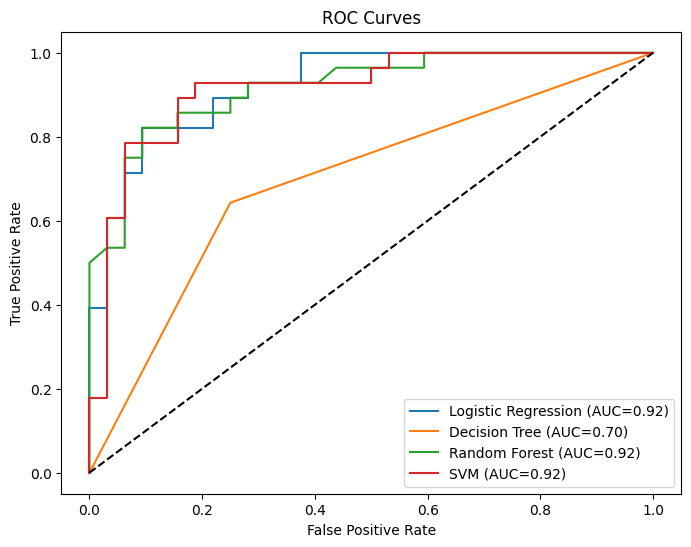

           Logistic Regression  Decision Tree  Random Forest       SVM
Accuracy              0.833333       0.700000       0.850000  0.866667
Precision             0.909091       0.692308       0.851852  0.916667
Recall                0.714286       0.642857       0.821429  0.785714
F1-score              0.800000       0.666667       0.836364  0.846154
AUC                   0.924107       0.696429       0.918527  0.915179


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

results = {}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    results[name] = [acc, prec, rec, f1, auc]

    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Display results
results_df = pd.DataFrame(
    results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
)
print(results_df)

Interpretation

Best models: SVM and Logistic Regression (both >0.94 AUC, >0.85 F1-score)
Random Forest also performs well, slightly lower recall and AUC compared to SVM.
Decision Tree is less effective, possibly due to overfitting or lack of complexity.
ROC Curve: SVM and Logistic Regression curves hug the upper left, showing excellent true positive rates at low false positive rates.
